This notebook simulates a communcation system. In this communication system, a sender sends a sequence of bits through a communication channel. Each bit is corrupted by additive noise that is Gaussian distributed with mean $m$ and standard deviation sigma. The output from the channel is the input bit plus the Gaussian noise.

In this homework, we will use the pandas data analysis package to analyze the output values from the Gaussian channel, and model data using probability distributions studied in class.

The following code imports necessary libraries and defines some classes, which will be used below. You can skip this part and start reading from the Introduction.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats 
import matplotlib.pyplot as plt

class source:
    '''source creating messages'''
    
    def __init__(self, p = 0.5, nbits = 20):
        '''initialize the source'''
        self.p = p # probability each bit is a 1
        self.nbits = nbits # number of bits in the message
        
    def message(self):
        '''create message'''
        return list(1*(np.random.rand(self.nbits) > self.p))

class Gaussian_noise_channel:
    "Gaussian noise channel for a bitstream of 1's and 0's"
    def __init__(self, m = 0, sigma = 0.25):
        self.m = m
        self.sigma = sigma
        
    def transmit(self, input_bitstream):
        "transmit an input bitstream"
        output_bitstream = input_bitstream + scipy.stats.norm.rvs(loc=self.m,scale=self.sigma,size=np.shape(input_bitstream))
        return output_bitstream

def data_frame(input_bitstream, output_values):
    "create a data frame to store the input and output"
    data = pd.DataFrame()
    data['Input']= input_bitstream
    data['Output']= output_values
    return data 

def decode(msg_in):
    "decode message"
    decode_msg = np.zeros(np.size(msg_in))
    for i in range(0,np.size(msg_in)):
        if msg_in[i]>0.5:
            decode_msg[i]=1
    return decode_msg

def count_errors(msg_in, msg_out):
    "count number of bit errors between two message"
    return sum( np.array(msg_in) != np.array(msg_out) )

### Random bitsteams as messages

Objects in the "source" class can create random bitstreams with varying lengths, as shown below. The value of **nbits** controsl the length of the bitstream.

Re-run the cell a few times to see that the random message changes from time to time. 

You can also try changing the value assigned to **nbits**.

In [2]:
src = source(nbits = 5) # create a source of random 5 bit bitstreams

msg = src.message() # generate a message (bitstream) from the source

print(f'This is the random message generated : {msg}')

This is the random message generated : [1, 0, 0, 1, 1]


### Gaussian Channel Model

The following code transmits a random bitstream through a Gaussian channel, and plots the input and output of the channel. The blue vertical lines show the size of the noise at each bit.

Run the cell several times to see how the input and the noise change from run to run.

You can also change the value of **sigma** in the channel to see how the variance of the Gaussian noise affects the received signal. Larger values of **sigma** correspond to more noise. Try **sigma** = 0.01, 0.1, 0.25 and 0.6 to see the effect.

 Input message = [0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0]
Received signal = [ 0.39146067  0.7105585   0.48539253  1.07360218 -0.05192925  0.03182728
  1.35641575 -0.71208758  0.42753036  1.37561772  0.84420499  1.14011741
  0.24476171  0.03032821  0.99105524 -0.46910708 -0.11313336  1.6452183
  0.11453534 -0.02691882]


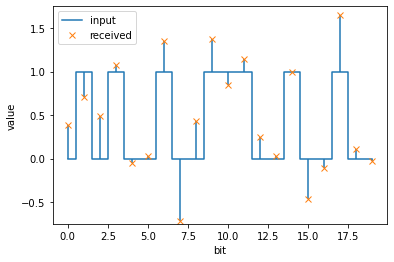

In [3]:
num_bits = 20

src = source(nbits = num_bits) # create a source of random 10 bit bitstreams
msg = src.message() # generate a message (bitstream) from the source
print(f' Input message = {msg}')

ch1 =  Gaussian_noise_channel(m=0, sigma=0.25) # create a Gaussian channel with m=0 and sigma=0.25

received_signal = ch1.transmit(msg) # transmit the message through the channel
print(f'Received signal = {received_signal}')

fig, ax = plt.subplots()
n = np.arange(0,num_bits)
ax.plot(n,msg,label='input',drawstyle='steps-mid')
ax.plot(n,received_signal,'x',label='received')
ax.vlines(n,msg,received_signal)
ax.set_ylim([-0.75, 1.75])

# label plots
ax.legend()
ax.set_xlabel('bit')
ax.set_ylabel('value')
plt.show()

### Decoding the received signal

The function decode compares each of the output values with a threshold 0.5. If an output value is greater than 0.5, then it assumes the transmitted bit was a 1, otherwise, it assumes the transmitted bit was a 0. 

The following code simulates the communication system and plots the input message, receieved signal and the decoded signal. If there is no error, the decoded signal (red dot) should coincide with the input (blue line). If it does not, then the noise pushed the received signal to the wrong side of the threshold.

If you don't see any errors, try re-running the cell. You can also try changing the noise level.

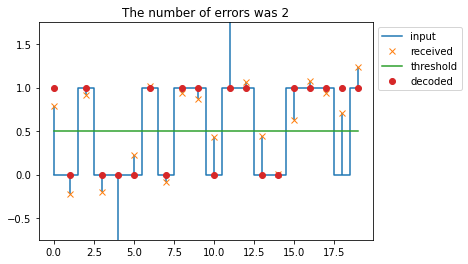

In [4]:
num_bits = 20
src = source(nbits = num_bits)
msg = src.message()

ch1 = Gaussian_noise_channel(sigma=0.4)

#run simulations
num_trials = 5
error_record = np.zeros(num_trials) # create numpy array to hold record of bit errors

n = np.arange(0,num_bits)
msg = src.message() # create a random message

received = ch1.transmit(msg) # transmit it over the channel
decode_msg = decode(received)

fig, ax = plt.subplots()
ax.plot(n,msg,label='input',drawstyle='steps-mid')
ax.plot(n,received,'x',label='received')
ax.plot(n,0.5*np.ones(np.shape(n)),label='threshold')
ax.vlines(n,msg,received)
ax.plot(n,decode_msg,'o',label='decoded')

# label plots
ax.set_ylim([-0.75, 1.75])
ax.legend(bbox_to_anchor=(1,1))
error_record = count_errors(msg, decode_msg) # count and record the number of errors
ax.set_title(f'The number of errors was {error_record}')
plt.show()




### Conditional densities of the received signals


Because the added noise is Gaussian, it should not be surprising to you that the conditional densities of the recieved signals given the input (0 or 1) are Gaussian with mean 0 or 1 and standard deviation equal to the standard deviation of the noise. 

We verify this empirically below, by comparing the conditional histograms of the received signals given the input with the conditional densities predicted theoretically.

We plot the conditional histograms of the data by using the groupby functionality of the pandas package in Python. The function **data_frame** creates a data frame that stores the input and output values. The code groups the output values based on the input bits (i.e., "0" or "1") using the **pandas.DataFrame.groupby** command. We plot the nomalized histograms of the output values for input bits "0" and "1", separately using the **matplotlib.axes.Axes.hist** command.

We compute values of the Gaussian distribution in python using the **scipy.stats.norm.pdf** function. Note that the Gaussian distribution is also called the normal distribution.

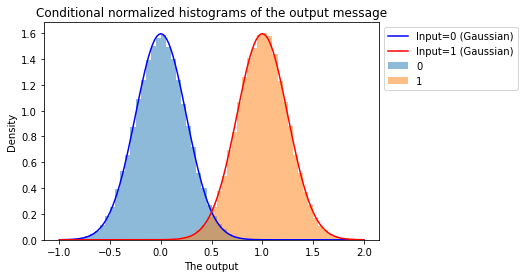

In [5]:
num_bits = 100000
sigma_noise = 0.25

# create source and channel
src = source(nbits = num_bits) # create a source of random 10 bit bitstreams
ch =  Gaussian_noise_channel(sigma=sigma_noise) # create a Gaussian channel

# transmit and receive message
msg = src.message() # generate a message (bitstream) from the source
received = ch.transmit(msg) # transmit the message through the channel

# plot conditional pdfs

#create figure
fig, ax = plt.subplots()

# compute and plot the conditional densities predicted theoretically
x = np.arange(-1, 2 + 0.02, 0.02)  # generate values from 0 to 2 with step 0.02
f_X_0 = scipy.stats.norm.pdf(x, loc = 0, scale = sigma_noise)
ax.plot(x, f_X_0, 'b', label = 'Input=0 (Gaussian)')
f_X_1 = scipy.stats.norm.pdf(x, loc = 1, scale = sigma_noise)
ax.plot(x, f_X_1, 'r', label = 'Input=1 (Gaussian)')

# plot the empirical distributions
data = data_frame(msg, received) # store the input and output values in data
groups = data.groupby('Input')['Output'] # group output values according to input values

bin_edges = np.arange(-1,2+0.05,0.05)
for  name,group in groups:
    ax.hist(group, bins = bin_edges, density = True,label = name, alpha = 0.5)

# label plots
ax.legend(bbox_to_anchor = (1,1))
ax.set_title('Conditional normalized histograms of the output message')
ax.set_xlabel('The output')
ax.set_ylabel('Density')
plt.show()


**Part a:** Calculate empirical mean $m$ and standard deviation $\sigma$ of the output values over all of the data without regard to inputs. 

For a set of data $\{r_1,r_2,⋯,r_n\}$, the empirical mean is given by 

$m=\frac{1}{n}\sum_{i=1}^{n}r_i$

and the empirical standard deviation is given by 

$\sigma=\sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(r_i-m)^2}$

You can compute the empirical mean and standard deviation easily using the **pandas.DataFrame.mean** and **pandas.DataFrame.std** functions applied to the dataframe **data** computed above.

Also, use your knowledge about probability to calculate the mean and standard deviation theoretically under the assumptions about the conditional densities given the input above and the assumption that the input bits 0 and 1 are equally likely. Your formula should depend upon the value of **sigma_noise**

The empirical estimate should be close to the value you calculate theoretically, even if you chnage the value of **sigma_noise** above.

In [10]:
# put your code here
mean = data["Output"].mean()
std = data["Output"].std()
print("empirical mean of the the Output is: ",mean)
print("empirical stantdard diviation of the the Output is: ",std)

mean_theoretical = 0.5*0+0.5*1
std_theoretical = np.sqrt(0.5*(0.0**2+sigma_noise**2) + 0.5*(1.0**2+sigma_noise**2) - mean_theoretical**2)
print("the theoretical mean is: " , mean_theoretical)
print("the theoretical standard diviation is: ", std_theoretical)

empirical mean of the the Output is:  0.5015018005038673
empirical stantdard diviation of the the Output is:  0.5595016339410935
the theoretical mean is:  0.5
the theoretical standard diviation is:  0.5590169943749475


**Part b:** Assume that the probability density function of the output values, $f_X(x)$, is given by a Gaussian distribution with theoretical mean and standard deviation computed in **Part a**.  

Compare empirical histogram of the all of the received signal values without regard to the input value with the plot of $f_X(x)$ by plotting both together in the same figure for $x$ from -1 to 2. You can plot the empirical histogram similar to the way we did the conditional histogram above, only this time by applying the **hist** method to the **data** data frame, rather than to the groups as we did above. 

Does this look like a good model of the data? What are the good and bad aspects of the model.

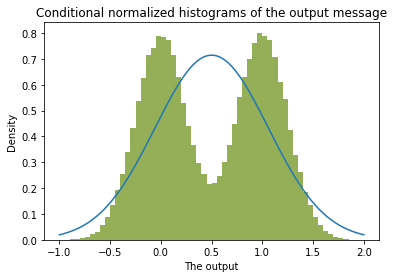

In [ ]:
um_bits = 100000
sigma_noise = 0.25

# create source and channel
src = source(nbits = num_bits) # create a source of random 10 bit bitstreams
ch =  Gaussian_noise_channel(sigma=sigma_noise) # create a Gaussian channel

# transmit and receive message
msg = src.message() # generate a message (bitstream) from the source
received = ch.transmit(msg) # transmit the message through the channel

# plot conditional pdfs

#create figure
fig, ax = plt.subplots()

# compute and plot the conditional densities predicted theoretically
x = np.arange(-1, 2 + 0.02, 0.02)  # generate values from 0 to 2 with step 0.02
new_f_X_0 = scipy.stats.norm.pdf(x, loc = mean, scale = std)
ax.plot(x, new_f_X_0)


# plot the empirical distributions
data = data_frame(msg, received) # store the input and output values in data

bin_edges = np.arange(-1,2+0.05,0.05)
for group in data:
    ax.hist(data.Output, bins = bin_edges, density = True, alpha = 0.5)

# label plots
ax.set_title('Conditional normalized histograms of the output message')
ax.set_xlabel('The output')
ax.set_ylabel('Density')
plt.show()


**Answer**


**Part c:** 

Calculate the relative frequency of errors made during decoding of the received signal in our simulation.

Compare the relative frequency to the probability of error calculated theoretically. 

To calculate the probability of error, first condition on the input and compute the probability of error given the input (0 or 1). Then use the total probability theorem to combine the two probabilities to a single probability of error.

For example, given that the input is zero, an error will occur if the received signal (which is Gaussian distributed with mean 0 and standard devation **sigma_noise**) is greater than 0.5. You can compute this probability either using the cumulative distribution function **scipy.stats.norm.cdf** or the survival function **scipy.stats.norm.sf**

In [ ]:
# put your code here
list1 = []
list2 = []
for items in data['Output']:
    if items <= 0.5:
        items = 0
    else: 
        items = 1
    list1.append(items)
for items in data['Input']:
    list2.append(items)
num_of_error = 0
for i in range(0,len(list1)):
    if list1[i] != list2[i]:
        num_of_error = num_of_error + 1
relative_frequency = num_of_error / len(list1)
print("the relative frequency of errors is: ",relative_frequency)

zero = 1- scipy.stats.norm.cdf(0.5,loc=0, scale=sigma_noise)
one = scipy.stats.norm.cdf(0.5,loc=1, scale=sigma_noise)

probability = 0.5*zero + 0.5*one
print("the probability is: ", probability)



the relative frequency of errors is:  0.02238
the probability is:  0.0227501319481792


**Part d:** Write code that simulate a transmission of **num_trials** times, where **num_bits** = 200, **num_trials** = 1000. Keep a record of the number of errors in each trial. 


Identify the theoretical distribution of the number of errors as a distribution we have studied in class. Compute the parameters of the theoretical distribution from the theoretical error calculations above. 

Plot the empirical histogram of the number of errors from -0.5 to 20 with bin size 1 and compare it to the plot of the theoretical distribution of the number of errors from -0.5 to 20.

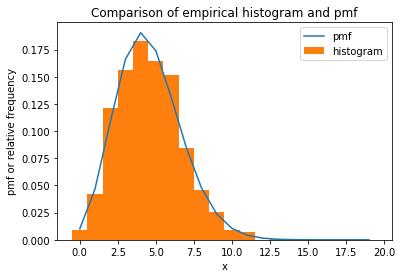

In [ ]:
# put your code here
num_bits = 200
num_trials = 1000
num_of_error = []

for i in range(0,num_trials):
    src = source(nbits = num_bits) # create a source of random 10 bit bitstreams
    ch = Gaussian_noise_channel(sigma=sigma_noise)

    msg = src.message() # generate a message (bitstream) from the source
    received = ch.transmit(msg)

    output = decode(received)
    num_of_error.append(count_errors(msg,output))

data = pd.DataFrame()
data['Output']= num_of_error

n = num_bits # number of bits
p = probability # probability of success
rv = scipy.stats.binom(n,p) # create a binomial random variable

# create a figure and a single subplot
fig, ax = plt.subplots() 

# plot pmf
x = np.arange(0,20) # x assumes integer values from 0 to 20 (note stop value not included)
ax.plot(x,rv.pmf(x),label='pmf') # plot the pmf of the random variable

# plot histogram
samples = data # draw sample of the random variable
bin_edges = np.arange(-0.5,20,1) # create array of bin edges
ax.hist(samples,bins=bin_edges,density=True,label='histogram') # plot histogram

# create labels
ax.legend() # show legend
ax.set_title('Comparison of empirical histogram and pmf') # set title
ax.set_xlabel('x') # set horizontal axis label
ax.set_ylabel('pmf or relative frequency') # set vertical axis label
plt.show()


**Part e:** From the record of the number of bit errors generated in the simulations above, calculate the relative frequency that the number of bit errors is more than 5 bits.

In [ ]:
# put your code here
num_of_error_more_than_five = 0
for items in num_of_error:
    if items > 5:
        num_of_error_more_than_five = num_of_error_more_than_five + 1
relative_frequency = num_of_error_more_than_five / num_trials
print(relative_frequency)

0.325


**Part f:** From the theoretical distribution, compute the probability that the number of bit errors is more than 5. This should be close to the relative frequency you calculated in **Part e**.

In [ ]:
# put your code here
probability_more_than_five = 1 - scipy.stats.binom.cdf(5,n,p)
print(probability_more_than_five)

0.3047357916440724
